In [19]:
import pandas as pd
import psycopg as pg
import matplotlib.pyplot as plt 
import numpy as np
import json

# engine = pg.connect("dbname='cpun' user='cpun' host='149.89.160.100' port='5432' password='C#Gh$!SY3@%vG5'")
engine = pg.connect("dbname='postgres' user='postgres' host='127.0.0.1' port='5432' password='4$g@38XUa2MvFb'")
df_pokemon = pd.read_sql('select * from pokedex_pokemon', con=engine)
df_trainer = pd.read_sql('select * from pokedex_trainer', con=engine)
df_energy = pd.read_sql('select * from pokedex_energy', con=engine)

C:\Users\ManOne\AppData\Local\Temp\ipykernel_25688\826439813.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pokemon = pd.read_sql('select * from pokedex_pokemon', con=engine)
C:\Users\ManOne\AppData\Local\Temp\ipykernel_25688\826439813.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trainer = pd.read_sql('select * from pokedex_trainer', con=engine)
C:\Users\ManOne\AppData\Local\Temp\ipykernel_25688\826439813.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_energy = pd.read_sql('select * from pokedex_e

In [20]:
df_pokemon

,id,card_id,name,rarity,image,prices,highest_market_price
0,1,base1-1,Alakazam,Rare Holo,https://images.pokemontcg.io/base1/1_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,44.14
1,2,base1-4,Charizard,Rare Holo,https://images.pokemontcg.io/base1/4_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,341.09
2,3,base1-5,Clefairy,Rare Holo,https://images.pokemontcg.io/base1/5_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,19.67
3,4,base1-2,Blastoise,Rare Holo,https://images.pokemontcg.io/base1/2_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,122.23
4,5,base1-3,Chansey,Rare Holo,https://images.pokemontcg.io/base1/3_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,27.93
...,...,...,...,...,...,...,...
63,64,base1-63,Squirtle,Common,https://images.pokemontcg.io/base1/63_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,1.31
64,65,base1-66,Tangela,Common,https://images.pokemontcg.io/base1/66_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.41
65,66,base1-67,Voltorb,Common,https://images.pokemontcg.io/base1/67_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.90
66,67,base1-68,Vulpix,Common,https://images.pokemontcg.io/base1/68_hires.png,{'url': 'https://prices.pokemontcg.io/tcgplaye...,0.48


In [21]:
# bar graph grouping by supertype and rarity of number of cards

# cat = [df_pokemon, df_trainer, df_energy]
# result = pd.concat(cat)

pokemon = len(df_pokemon.index)
trainer = len(df_trainer.index)
energy = len(df_energy.index)

sizes = [Pokemon, Trainer, Energy]
names = ['pokemon','trainer', 'energy']
print(sizes)
plt.bar(names, sizes)
plt.title('Number of Pokemon Cards')
plt.xlabel('Type of Card')
plt.ylabel('Number of Cards')

# plt.show()

NameError: name 'Pokemon' is not defined

In [22]:
pokemon_r = (df_pokemon.groupby('rarity').size())
print(pokemon_r)

rarity
Common       27
Rare          6
Rare Holo    15
Uncommon     20
dtype: int64


[68, 26, 7]


([<matplotlib.patches.Wedge at 0x1d15236bbd0>,
 [Text(-0.5696345228363144, 0.9410188682449702, 'Pokemon'),
  Text(0.3529082453884962, -1.0418520865923402, 'Trainers'),
  Text(1.0740283502296213, -0.23761966017785321, 'Energy')],
 [Text(-0.31070973972889876, 0.513283019042711, '67%'),
  Text(0.19249540657554334, -0.5682829563230946, '26%'),
  Text(0.5858336455797933, -0.12961072373337448, '7%')])

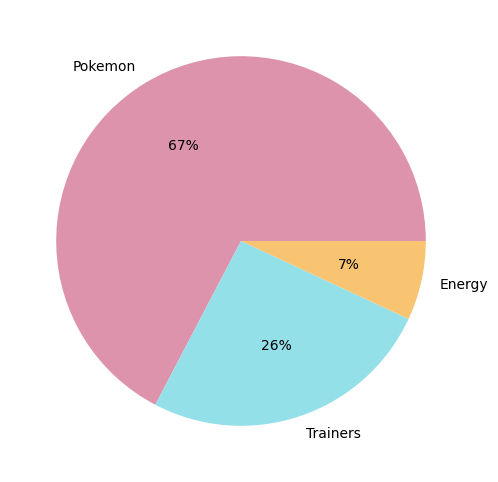

In [24]:
sizes = [len(df_pokemon.index), len(df_trainer.index), len(df_energy.index)]
labels = ['Pokemon', 'Trainers', 'Energy']
colors = ['#dd93ac', '#94e0e8', '#f8c471']
print(sizes)
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', colors=colors)

C:\Users\ManOne\AppData\Local\Temp\ipykernel_25688\1987641933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pokemon_types_link = pd.read_sql('select * from pokedex_pokemon_types', con=engine).set_index('pokemon_id').drop(['id'], axis=1)
C:\Users\ManOne\AppData\Local\Temp\ipykernel_25688\1987641933.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_types = pd.read_sql('select * from pokedex_type', con=engine)


([<matplotlib.patches.Wedge at 0x1d15a3dce10>,
 [Text(0.9609846208671619, 0.5352649423012844, 'Colorless'),
  Text(0.2518455651384785, 1.070781869159205, 'Fighting'),
  Text(-0.5352649872882208, 0.9609845958096004, 'Fire'),
  Text(-1.0988262771789072, 0.050801698604904334, 'Grass'),
  Text(-0.662898004534826, -0.8778190221131837, 'Lightning'),
  Text(0.10149531756489509, -1.095307582605179, 'Psychic'),
  Text(0.9352389226549122, -0.5790752606969836, 'Water')],
 [Text(0.5241734295639064, 0.29196269580070056, '16%'),
  Text(0.1373703082573519, 0.5840628377232027, '10%'),
  Text(-0.29196272033902954, 0.5241734158961456, '13%'),
  Text(-0.5993597875521312, 0.027710017420856905, '19%'),
  Text(-0.3615807297462687, -0.47881037569810014, '12%'),
  Text(0.05536108230812459, -0.5974404996028249, '12%'),
  Text(0.5101303214481339, -0.3158592331074455, '18%')])

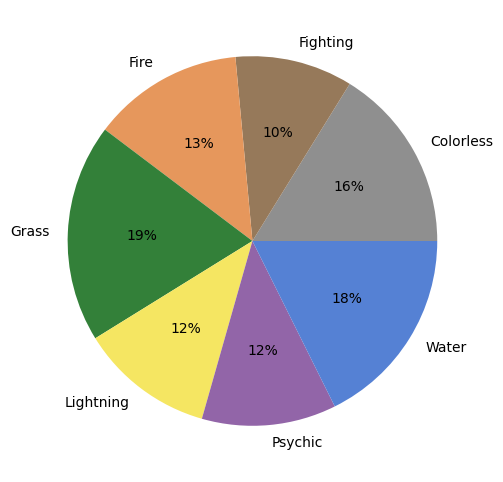

In [102]:
df_pokemon_types_link = pd.read_sql('select * from pokedex_pokemon_types', con=engine).set_index('pokemon_id').drop(['id'], axis=1)
df_types = pd.read_sql('select * from pokedex_type', con=engine)
df_pokemon_types = pd.merge(df_pokemon, df_pokemon_types_link, left_on='id', right_on='pokemon_id')
df_pokemon_types = pd.merge(df_pokemon_types, df_types, left_on='type_id', right_on='id', suffixes=[None, '_type']).drop(['id_type'], axis=1)
df_type_count = df_pokemon_types.groupby(['name_type'], as_index=False).count()
df_type_count
fig, ax = plt.subplots(figsize=(6, 6))
labels = df_type_count['name_type']
colors = ['#8f8f8f', '#96795a', '#e6975c', '#338039', '#f5e662', '#9265a8', '#5581d4']
plt.pie(df_type_count['id'], autopct='%1.0f%%', labels=labels, colors=colors)

,rarity,id,card_id,name,image,prices,highest_market_price
0,Common,27,27,27,27,27,27
1,Rare,6,6,6,6,6,6
2,Rare Holo,15,15,15,15,15,15
3,Uncommon,20,20,20,20,20,20


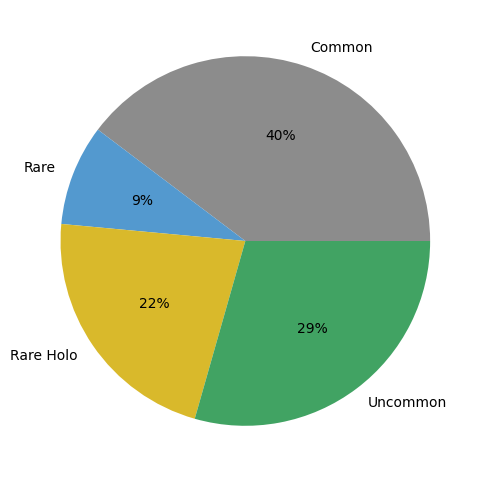

In [112]:
df_rarity = df_pokemon.groupby(['rarity'], as_index=False).count()
fig, ax = plt.subplots(figsize=(6, 6))
labels = df_rarity['rarity']
colors = ['#8c8c8c', '#5399cf', '#d9b92b', '#41a363']
plt.pie(df_rarity['id'], autopct='%1.0f%%', labels=labels, colors=colors)
df_rarity